In [1]:
import numpy as np
# import argparse
import os
import sys
import torch
import torch.fft as F
from importlib import reload
from torch.nn.functional import relu
import torch.nn as nn
import torch.nn.functional as Func
import torch.optim as optim
import utils
from utils import *

from matplotlib import pyplot as plt
import random
import copy
# from sklearn.model_selection import train_test_split

import skimage
from MoDL.MoDL import *
from mnet import MNet
from unet.unet_model import UNet
from unet.unet_model_fbr import Unet
from unet.unet_model_banding_removal_fbr import UnetModel

torch.manual_seed(0)
np.random.seed(0)
random.seed(0)

In [2]:
hist = np.load('/mnt/shared_a/checkpoints/leo/recon/Hist_MoDL_2_chans_32_epoch_9.npz')
hist.files

['trainloss',
 'trainloss_epoch',
 'train_lp',
 'train_ssim',
 'valloss_epoch',
 'val_ssim',
 'val_lp',
 'mnetpath']

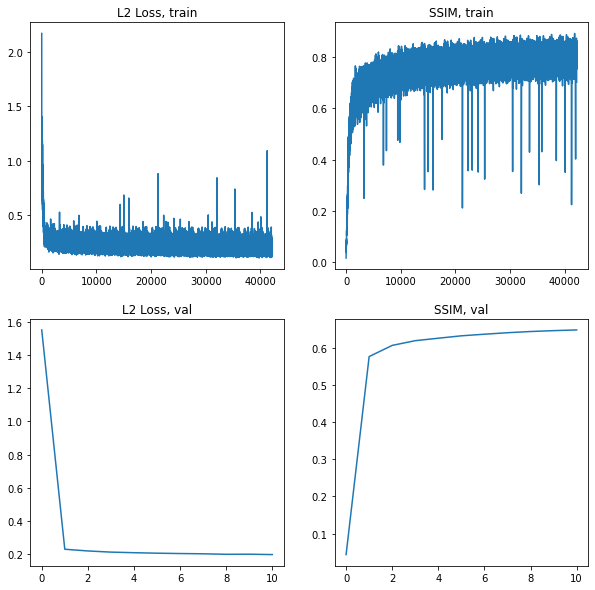

In [4]:
fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0,0].plot(hist['train_lp'])
axs[0,0].set_title('L2 Loss, train')

axs[0,1].plot(hist['train_ssim'])
axs[0,1].set_title('SSIM, train')

axs[1,0].plot(hist['val_lp'])
axs[1,0].set_title('L2 Loss, val')

axs[1,1].plot(hist['val_ssim'])
axs[1,1].set_title('SSIM, val')
plt.show()

In [ ]:
%run modl_train.py -m rand

In [ ]:
from modl_train import prepare_data

In [ ]:
train_in, train_label, train_mask, val_in, val_label, val_mask = prepare_data(mode='rand', base=8, budget=24,batchsize=5,unet_inchans=2,datatype=torch.float,device='cuda:0')

In [ ]:
modl = MoDL(CG_steps=6,CG_tol=5e-5)

In [ ]:
data = train_in[0:2,:,:,:]
smap = torch.ones(data.shape[0],1,data.shape[1],data.shape[2],data.shape[3])
mask = torch.ones(data.shape)

In [ ]:
with torch.no_grad():
    x_out = modl(data,smap,mask)
plt.figure()
plt.imshow(x_out[0,0,:,:])
plt.colorbar()
plt.show()

In [ ]:
lpnorm(x_out,data,mode='mean')

In [ ]:
for name, param in modl.named_parameters():
    if param.requires_grad:
        print(name)